# Machine Learning

#### Scikit-learn
Popular library for machine learning, most effective machine-learning algorithms as estimators.
- Algorithms encapsulated so no need to know the intricate details & heavy mathematics of how they work
- Helps build powerful models to quickly analyze data, extract insights from data, and make predicitons

Data is split into training & testing sets:
- Training set is subset of the data used to train the model
- Validation set is a subset of the data used to tune the hyperparameters of the model
- Testing set is a subset of the data used to assess the performance of the model to see how it acts in unseen circumstances

Scikit-learn has tools to automate training & testing models

#### Case Study: Classification with k-Nearest Neighbors
Problem: Digit recognition problem. We must predict which digit an image represents.
- Total number of classes is 10 because there are 10 digits (0-9) (multi-classification problem).
- Relavent Dataset: Scikit-learn comes with the "Digits Dataset", that consists of 8*8 pixel images representing 1797 hand-written digits
- Choice of Algorithm: k-Nearest Neighbor (algorithm that detects a test sample's class by looking at the k training samples that are nearest in distance to the test sample)

In [16]:
# Loading the Dataset

from sklearn.datasets import load_digits
digits = load_digits()

print(digits.target[::100])
# digits.data.shape

# image '13' in digits is '3'
digits.images[13]

[0 4 1 7 4 8 2 2 4 4 1 9 7 3 2 1 2 5]


array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

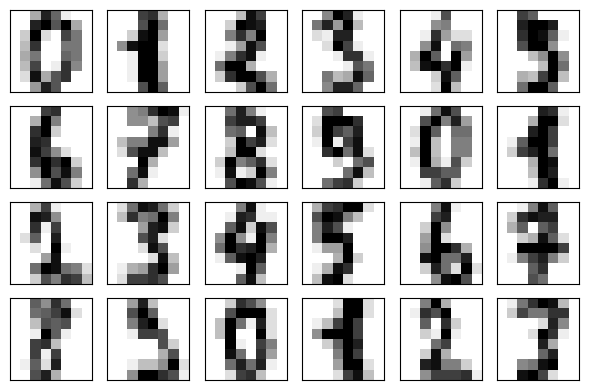

In [24]:
# Visualizing the Data (Data Exploration)

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6,4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
plt.tight_layout()
plt.show()

In [45]:
# Splitting the Data for Training & Testing

from sklearn.model_selection import train_test_split

# split with train_test_split()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

# X_train contains the features (independent variables) while y_train contains the labels (dependent variables)
# X_test & y_test are the testing sets, & should be smaller than the training set
print(X_train.shape) #75% - of 1797 samples - training data
print(X_test.shape) #25% - of 1797 samples - testing data

# NOTE: for a different sized split, we can include the parameter: test_size=0.20 (for 20% testing data split)

(1347, 64)
(450, 64)


In [51]:
# Creating the Model and Training It

from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier() is a machine learning model that implements the K-Nearest-Neighbors (KNN)
#    algorithm for classification. 'knn' will store the instances of the classifier
knn = KNeighborsClassifier()

knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [55]:
# Predicting Digit Classes

# use the previously trained model from our training set on the separate test set
predicted = knn.predict(X=X_test)
expected = y_test

print(predicted[:20])
print(expected[:20])

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print(wrong)

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4), (2, 8), (9, 8), (3, 8), (3, 8), (1, 8)]


97.78%
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  0 54  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  1  0  1  0  0]
 [ 0  0  0  0 49  0  0  1  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  1  1  2  0  0  0  0 39  1]
 [ 0  0  0  0  1  0  0  0  1 41]]


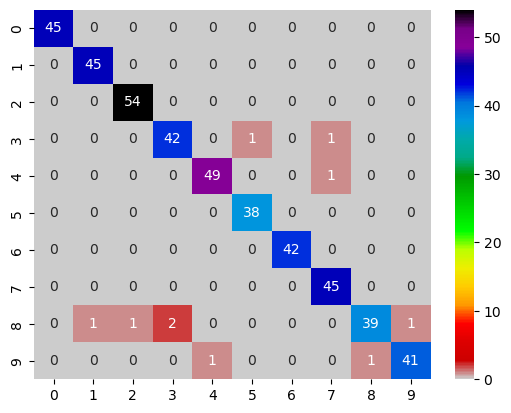

In [61]:
# Metrics for Model Accuracy

# score: Returns the mean accuracy on the given test data and labels.
print(f'{knn.score(X_test, y_test):.2%}')

# ALTERNATIVELY: use a confusion matrix - evaluates the performance
#    of a classification model by comparing predicted and actual values
from sklearn.metrics import confusion_matrix

# rows represent prediction values while columns represent the true classes of the dataset
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

# Visualizing the Confusion Matrix
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [66]:
# Classification Report

from sklearn.metrics import classification_report

# names are the individual digits (labels) from our data set (0-9)
names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Precision: total number of correct predictions for a given digit divided by the total number of predictions for that digit
- indicates how many of the predicted positive cases were actually positive

Recall: total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit (correct / what should have been correct)
- indicates how many actual positive cases were correctly predicted by the model

f1-score: the harmonic average of the precision and the recall

Support: the number of samples with a given expected value

#### For More on KNN Algorithm:
https://www.tutorialspoint.com/machine_learning/machine_learning_knn_nearest_neighbors.htm